In [222]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree

In [223]:
!pip install seaborn 

In [224]:
data=pd.read_csv("Fraud_check.csv")
data


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [226]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [227]:
data.isnull().sum() #no null values

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [228]:
data.isna().sum() #no missng values

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [229]:
data[data.duplicated()] #no duplicate values

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [230]:
data=data.rename(columns={"Marital.Status":"Marital_status","Taxable.Income":"Taxable_income","City.Population":"City_population","Work.Experience":"Work_experience"})

In [231]:
data

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [232]:
#change categoricalvalues into numerical 
labelencoder=LabelEncoder()
data["Undergrad"]=labelencoder.fit_transform(data["Undergrad"])
data["Marital_status"]=labelencoder.fit_transform(data["Marital_status"])
data["Urban"]=labelencoder.fit_transform(data["Urban"])

In [233]:
print(data["Taxable_income"].min())
data["Taxable_income"].max()

10003


99619

In [234]:
data["Tax"]= pd.cut(data["Taxable_income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [235]:
data["Tax"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [236]:
data

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban,Tax
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [237]:
data= pd.get_dummies(data,columns=["Tax"],drop_first=True)
data

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban,Tax_Good
0,0,2,68833,50047,10,1,True
1,1,0,33700,134075,18,1,True
2,0,1,36925,160205,30,1,True
3,1,2,50190,193264,15,1,True
4,0,1,81002,27533,28,0,True
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,True
596,1,0,69967,55369,2,1,True
597,0,0,47334,154058,0,1,True
598,1,1,98592,180083,17,0,True


In [238]:
corr=data.corr()
corr

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban,Tax_Good
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,-0.012523
Marital_status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,-0.006081
Taxable_income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,0.688725
City_population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,-0.012225
Work_experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,-0.004830
Tax_Good,-0.012523,-0.006081,0.688725,-0.012225,0.001972,-0.004830,1.000000


<Axes: >

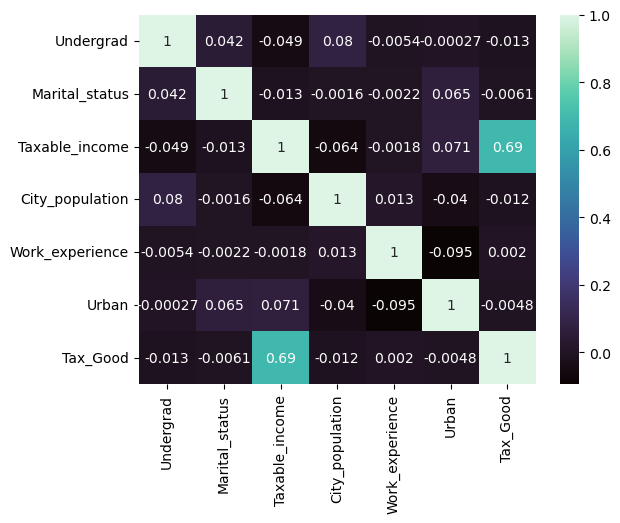

In [239]:
sns.heatmap(corr,annot=True,cmap="mako")

array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital_status'}>],
       [<Axes: title={'center': 'Taxable_income'}>,
        <Axes: title={'center': 'City_population'}>],
       [<Axes: title={'center': 'Work_experience'}>,
        <Axes: title={'center': 'Urban'}>]], dtype=object)

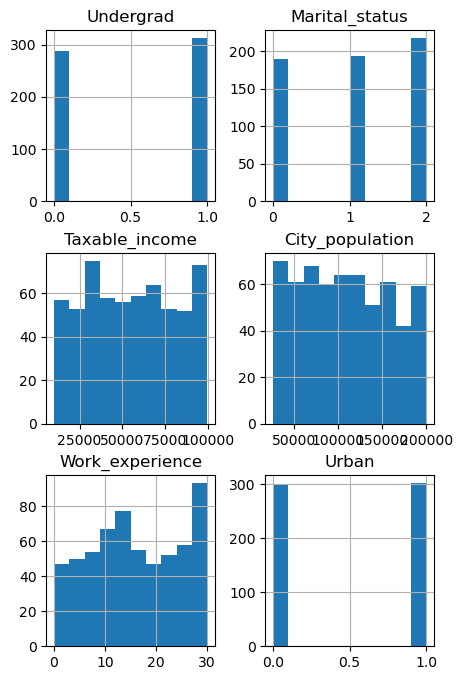

In [240]:
data.hist(figsize=(5,8))

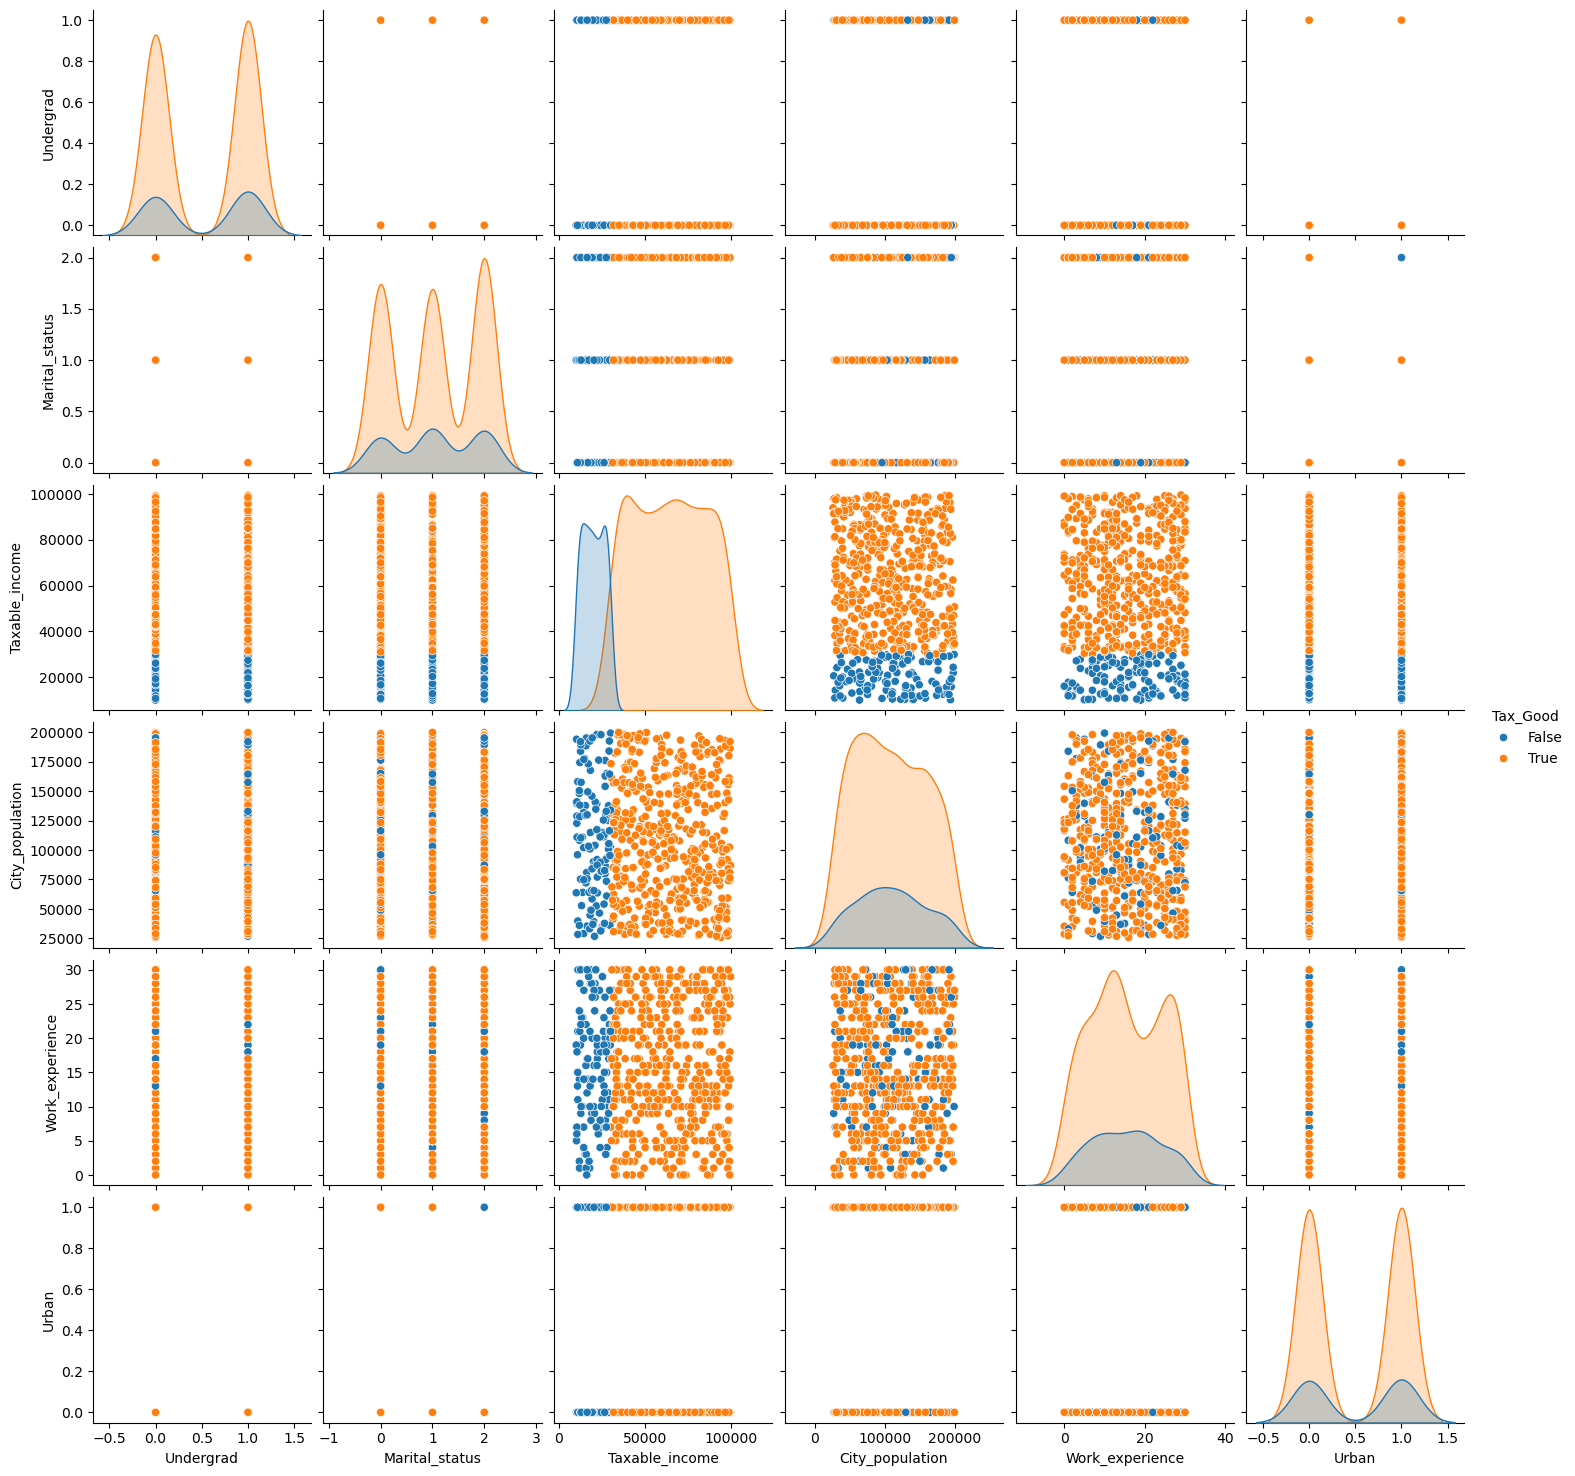

In [241]:
sns.pairplot(data,hue="Tax_Good")

<Axes: xlabel='Work_experience', ylabel='City_population'>

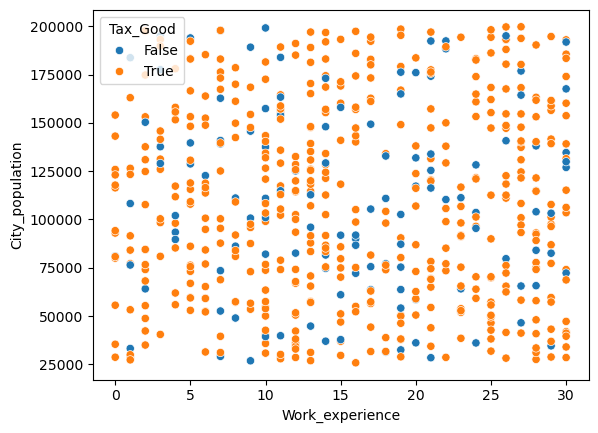

In [242]:
sns.scatterplot(x=data["Work_experience"],y=data["City_population"],hue=data["Tax_Good"])

<Axes: xlabel='Taxable_income', ylabel='City_population'>

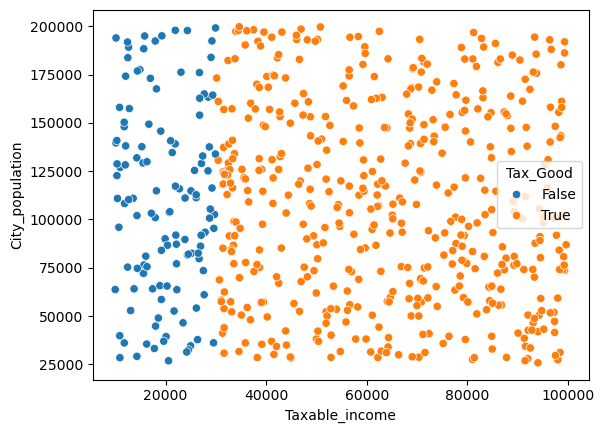

In [243]:
sns.scatterplot(x=data["Taxable_income"],y=data["City_population"],hue=data["Tax_Good"])

In [244]:
#normalising the data
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [245]:
data_n=norm(data.iloc[:,:6])
data_n

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,0.0,1.0,0.656468,0.139472,0.333333,1.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0
...,...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333,1.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0


In [246]:
x=data_n
y=data["Tax_Good"]

In [247]:
x_train,x_test,y_train,y_test=r=train_test_split(x,y,test_size=0.4,random_state=12)

In [248]:
model=DecisionTreeClassifier(max_depth=3)

In [249]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [250]:
y_pred=model.predict(x_test)

[Text(0.5, 0.75, 'x[2] <= 0.231\ngini = 0.355\nsamples = 360\nvalue = [83, 277]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 277\nvalue = [0, 277]')]

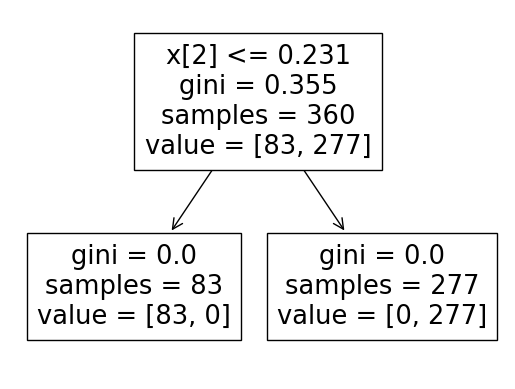

In [251]:
tree.plot_tree(model)

In [252]:
accuracy_score(y_test,y_pred)*100

98.75

In [253]:
np.mean(y_test==y_pred)

0.9875

In [254]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       False       0.93      1.00      0.96        41\n        True       1.00      0.98      0.99       199\n\n    accuracy                           0.99       240\n   macro avg       0.97      0.99      0.98       240\nweighted avg       0.99      0.99      0.99       240\n'

In [255]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 41,   0],
       [  3, 196]], dtype=int64)

<Axes: >

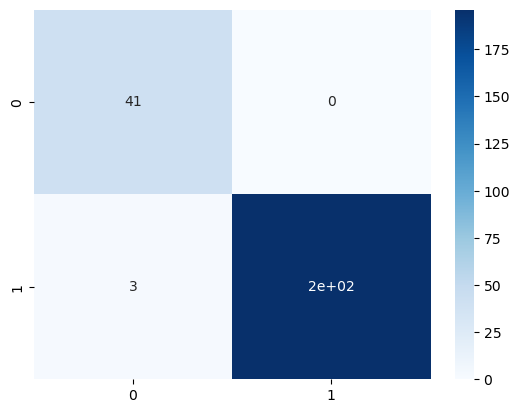

In [256]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [257]:
## DecisionTree with Entropy
model_e=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [258]:
y_pred=model_e.predict(x_test)

[Text(0.5, 0.75, 'x[2] <= 0.231\nentropy = 0.779\nsamples = 360\nvalue = [83, 277]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 277\nvalue = [0, 277]')]

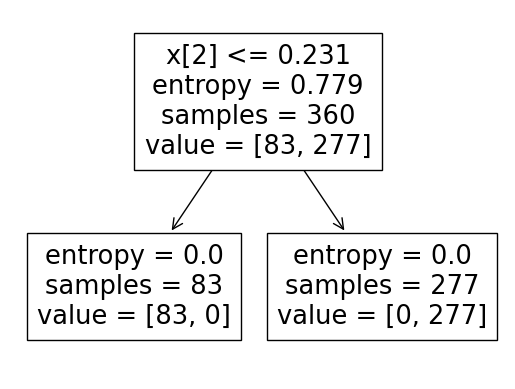

In [259]:
tree.plot_tree(model_e)

In [260]:
accuracy_score(y_test,y_pred)*100

98.75

In [261]:
np.mean(y_test==y_pred)

0.9875

In [262]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       False       0.93      1.00      0.96        41\n        True       1.00      0.98      0.99       199\n\n    accuracy                           0.99       240\n   macro avg       0.97      0.99      0.98       240\nweighted avg       0.99      0.99      0.99       240\n'

In [263]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 41,   0],
       [  3, 196]], dtype=int64)

<Axes: >

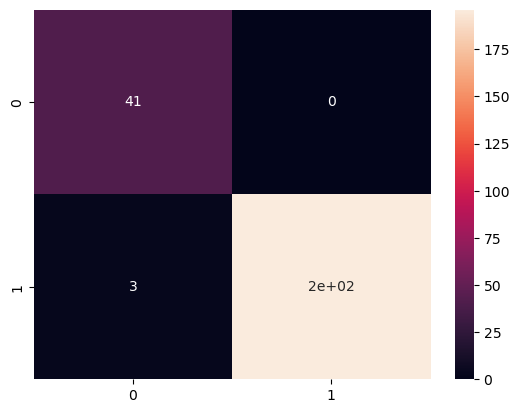

In [264]:
sns.heatmap(cm,annot=True)

In [265]:
#Decision tree with gini
model_g = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_g.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [266]:
y_pred=model_g.predict(x_test)


[Text(0.5, 0.75, 'x[2] <= 0.231\ngini = 0.355\nsamples = 360\nvalue = [83, 277]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 277\nvalue = [0, 277]')]

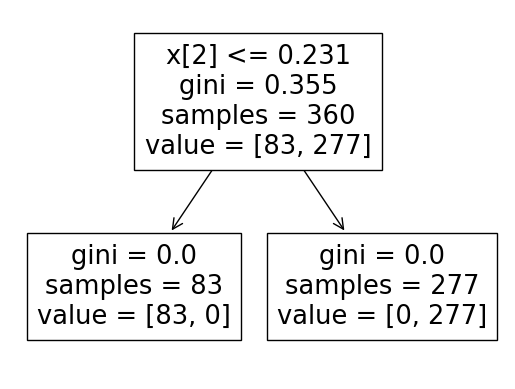

In [268]:
tree.plot_tree(model_g)

In [269]:
np.mean(y_pred==y_test)

0.9875

In [270]:
accuracy_score(y_test,y_pred)

0.9875

In [271]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       False       0.93      1.00      0.96        41\n        True       1.00      0.98      0.99       199\n\n    accuracy                           0.99       240\n   macro avg       0.97      0.99      0.98       240\nweighted avg       0.99      0.99      0.99       240\n'

In [272]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 41,   0],
       [  3, 196]], dtype=int64)

<Axes: >

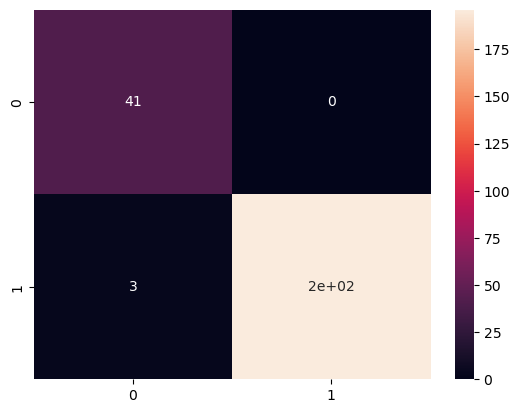

In [273]:
sns.heatmap(cm,annot=True)

In [275]:
#DT using regressor
from sklearn.tree import DecisionTreeRegressor
df=data.values
x = df[:,0:3]
y = df[:,3]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
DecisionTreeRegressor()
model.score(x_test,y_test)

-1.2349058304660403